# 🏔 Plot model terrain

In [1]:
from herbie import Herbie
from paint.terrain2 import cm_terrain
from toolbox import EasyMap, pc, ccrs

## HRRR Model Terrain

In [2]:
H = Herbie("2022-01-01", product="sfc")
ds = H.xarray("(?:HGT|LAND):surface")
ds

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2022-01-01
    step                 timedelta64[ns] 00:00:00
    surface              float64 0.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2022-01-01
Dimensions without coordinates: y, x
Data variables:
    lsm                  (y, x) float32 ...
    orog                 (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20220101\subset_04ef...
    search:            (?:HGT|LAND):surface

In [3]:
# We want to set the water points to some other value for our colorbar
ds.orog.min().item()

-81.14286041259766

In [4]:
# Every land point we set the elevation as -100
ds["orog"] = ds.orog.where(ds.lsm > 0, -100)

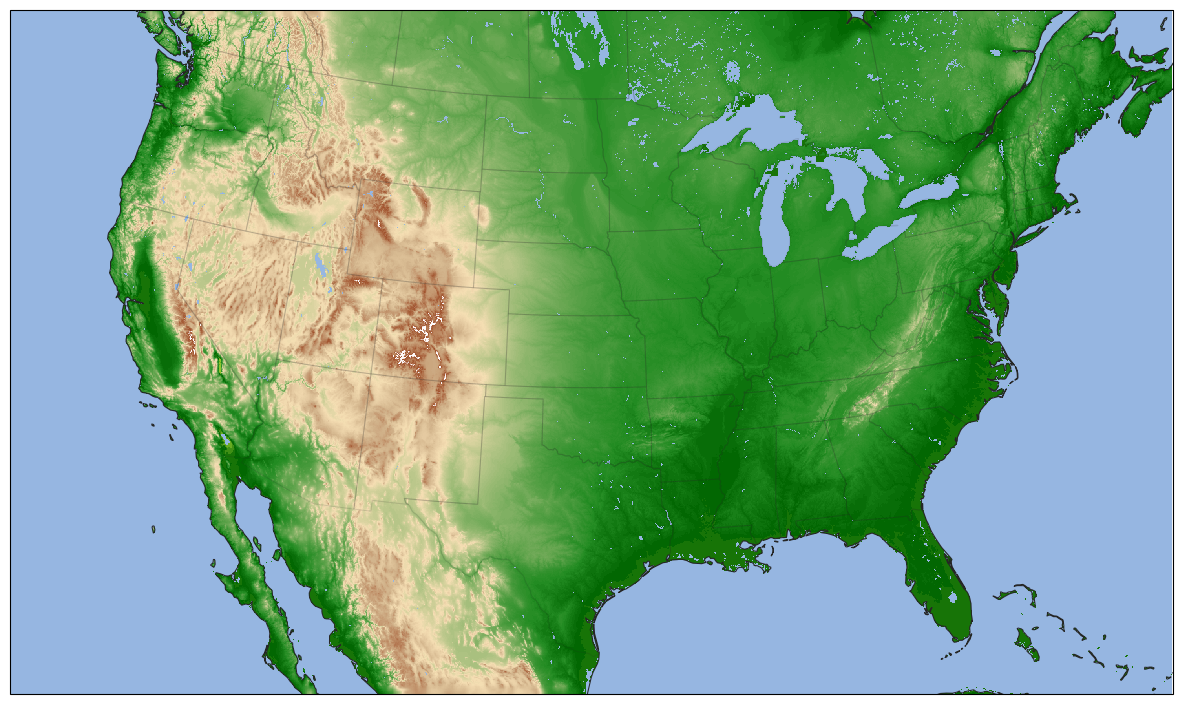

In [5]:
ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(water=True, water_threshold=-99).cmap_kwargs,
)

Adjusting the colormap for different color effects.

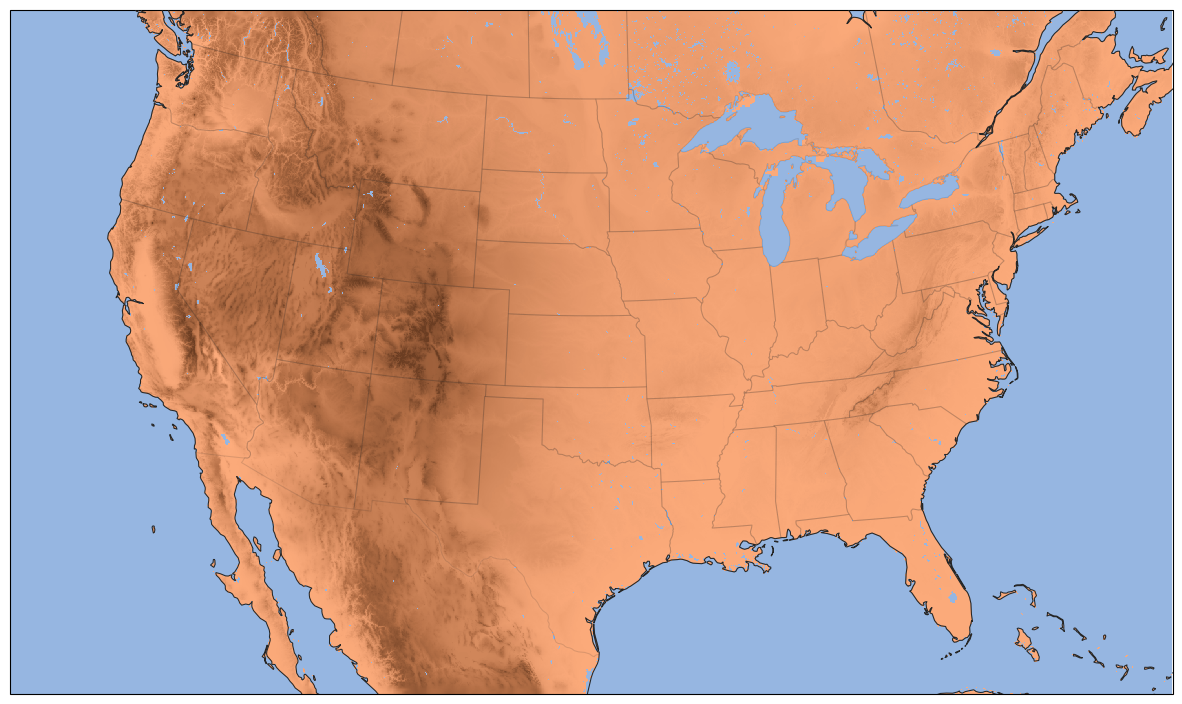

In [7]:
ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(water=True, land_color_scheme=2, water_threshold=-99).cmap_kwargs,
)

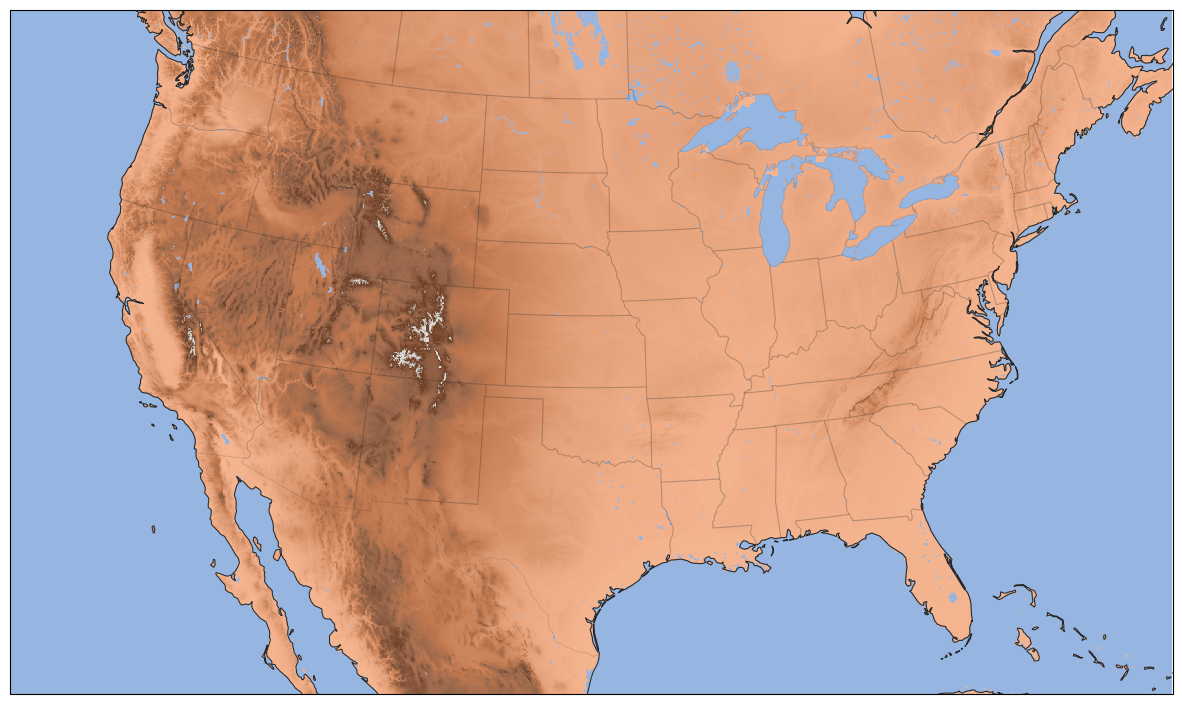

In [9]:
landcolor = [
    (0, "#f8b893"),
    (0.4, "#c0784f"),
    (0.6, "#97674c"),
    (0.85, "#6b3d22"),
    (1, "#dadada"),
]

ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(
        water=True, land_color_scheme=landcolor, water_threshold=-99
    ).cmap_kwargs,
)

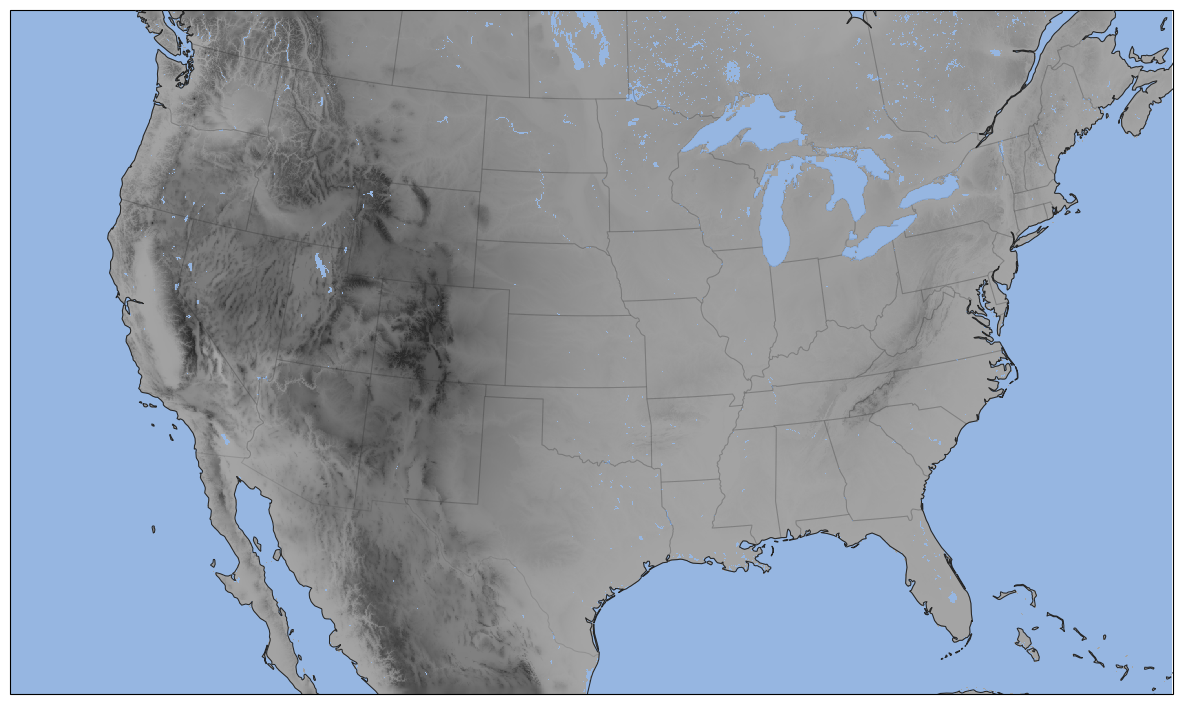

In [10]:
landcolor = [
    (0, "#a7a7a7"),
    (1, "#2b2b2b"),
]

ax = EasyMap("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(
        water=True, land_color_scheme=landcolor, water_threshold=-99
    ).cmap_kwargs,
)

## GFS Model Terrain

Herbie actually has a little shortcut to return the terrain fields with the water points masked out. (Might not work for all models).

In [3]:
H = Herbie("2022-01-01", model="gfs")
ds = H.terrain()
ds

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2022-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset>
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 2022-01-01
    step                 timedelta64[ns] 00:00:00
    surface              float64 0.0
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time           datetime64[ns] 2022-01-01
Data variables:
    lsm                  (latitude, longitude) float32 0.0 0.0 0.0 ... 1.0 1.0
    orog                 (latitude, longitude) float32 nan nan ... 2.775e+03
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gfs
    product:                 pgrb2.0p25
    description:             Global Forecast System
    remote_grib:             https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20...
    local_grib:              C:\Users\blaylock\data\gfs\20220101\subset_04ef4...
    search:            :(?:HGT|LAND):surface

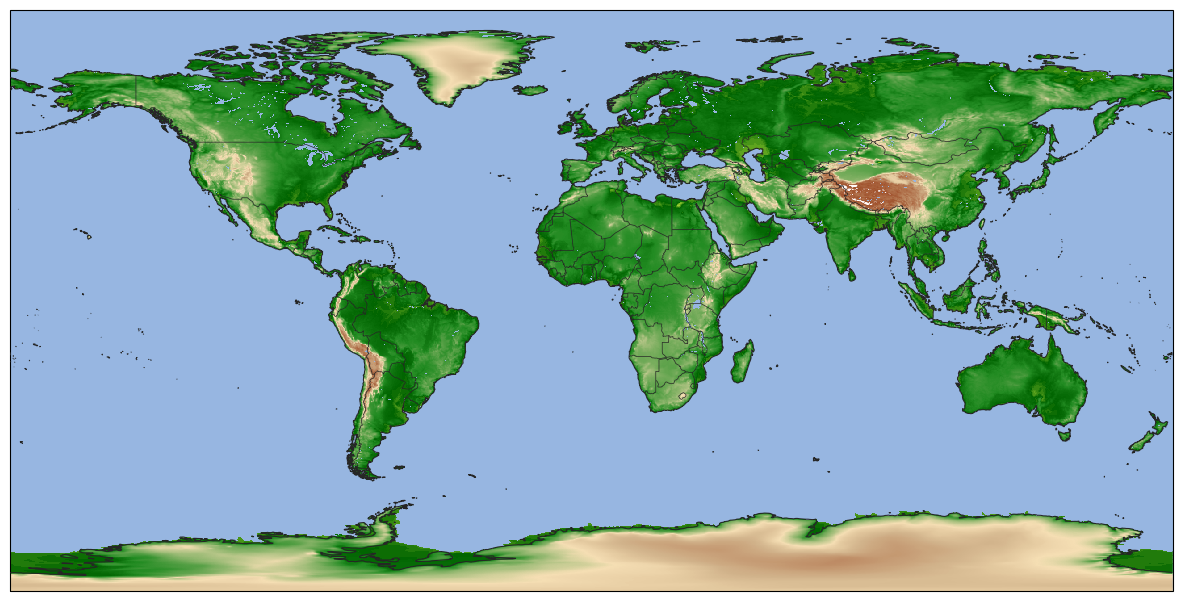

In [7]:
ax = EasyMap("50m", figsize=[15, 9]).BORDERS().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(water=False, land_top=5500).cmap_kwargs,  # need to set water=False
)


# Since the water points were masked, lets just set the map facecolor to blue for water.
ax.set_facecolor("#97b6e1")